In [7]:
# Import packages
import os
import argparse
import time
import numpy as np
import pylab as plt
import matplotlib.pyplot as plt
import torch
from torchdiffeq import odeint_adjoint as odeint
from burgers import get_burgers, get_burgers_fd, set_initial_condition
from graphic_tools import simple_plotter, show_state

---
# Burgers equation
---

## Analytical solution
Viscous Burgers equation in 1D is given by:
$\frac{\partial u}{\partial t} + \frac{1}{2} u\frac{\partial u}{\partial x} = \nu \frac{\partial^2 u}{\partial x^2}$
with $x \in [a, b]$ and $0 < t \leq T$.

We might start with initial conditions such as $u(x, 0) = u_0(t)$, $a=0, b=1.5, T=1$.

In [2]:
t_n = 100
x_n = 100
x_min = 0.
x_max = 1.
t_min = 0.
t_max = 1.
nu = 0.003

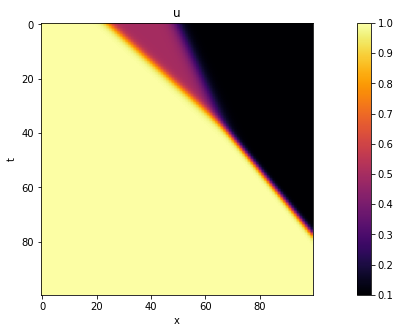

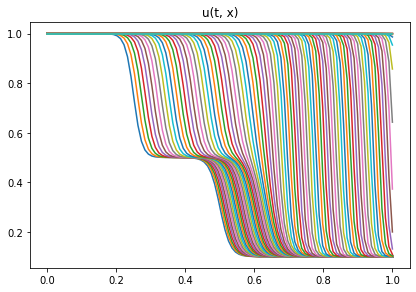

In [18]:
u_true = get_burgers(t_max, t_min, x_max, x_min, t_n, x_n, nu)
show_state(u_true, 'u')
simple_plotter(u_true, 'u(t, x)')

We discretize in domain space with $x_i = i \Delta x,\ i=\{0, \dots, N\}$ and $\Delta x = \frac{L}{N},\ L=b$ using finite difference method.

$u_{xx} = \frac{u_{i+1} - 2u_{i} + u_{i-1}}{(\Delta x)^2}$

$u_{x} = \frac{u_{i+1} - u_{i-1}}{2(\Delta x)}$

$u_{t} = \frac{u_{i+1} - u_{i}}{\Delta t}$

$u^{t+1}_{i} = u^{t}_{i} + \Delta t \Big(\nu \frac{u^{t}_{i+1} - 2 u^{t}_{i} + u^{t}_{i-1}}{(\Delta x)^2} - \frac{1}{4} u^{t}_{i} \frac{u^{t}_{i+1} - u^{t}_{i-1}}{\Delta x} \Big)$

(100, 100)


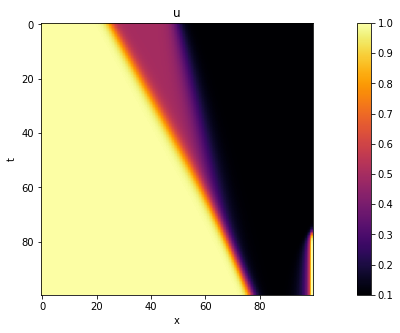

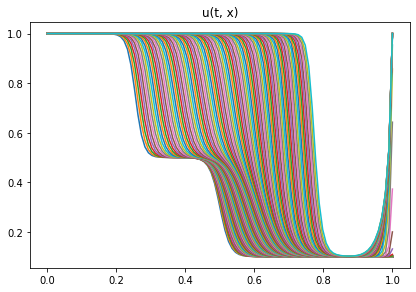

In [8]:
t_n = 100
x_n = 100
x_min = 0.
x_max = 1.
t_min = 0.
t_max = 1.5
nu = 0.003

u_df = get_burgers_fd(t_max, t_min, x_max, x_min, t_n, x_n, nu, set_initial_condition)
print(u_df.shape)
show_state(u_df, 'u')
simple_plotter(u_df, 'u(t, x)')

In [88]:
def relative_err(t_max, t_min, x_max, x_min, t_n, x_n, nu, debug=True):
    dt = (t_max - t_min) / t_n
    dx = (x_max - x_min) / x_n
    rms = np.zeros((t_n, x_n))
    
    u_ex = get_burgers(t_max, t_min, x_max, x_min, t_n, x_n, nu)
    u_fd = get_burgers_fd(t_max, t_min, x_max, x_min, t_n, x_n, nu, set_initial_condition)
    rms = np.true_divide(np.abs(u_ex - u_fd), np.abs(u_ex))
    
    if debug:
        show_state(u_ex, 'u_ex')
        show_state(u_fd, 'u_fd')
        
    return rms

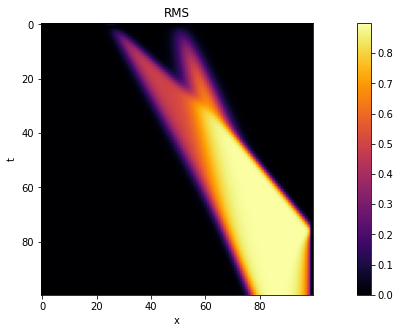

In [89]:
err = relative_err(t_max, t_min, x_max, x_min, 100, 100, 0.003, debug=False)
show_state(err, 'RMS')